In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with h5py.File('10MHzMeasurement.hdf', 'r') as h5file:
    freq10 = h5file['frequencies'][:]
    stat10 = h5file['statistics'][:]
    stab10 = h5file['stability'][:]
    
with h5py.File('10MHzPLLMeasurement.hdf', 'r') as h5file:
    freq10pll = h5file['frequencies'][:]
    stat10pll = h5file['statistics'][:]
    stab10pll = h5file['stability'][:]

with h5py.File('20MHzMeasurement.hdf', 'r') as h5file:
    freq20 = h5file['frequencies'][:]
    stat20 = h5file['statistics'][:]
    stab20 = h5file['stability'][:]
    
with h5py.File('30MHzMeasurement.hdf', 'r') as h5file:
    freq30 = h5file['frequencies'][:]
    stat30 = h5file['statistics'][:]
    stab30 = h5file['stability'][:]

with h5py.File('50MHzMeasurement.hdf', 'r') as h5file:
    freq50 = h5file['frequencies'][:]
    stat50 = h5file['statistics'][:]
    stab50 = h5file['stability'][:]

In [3]:
stab10 = np.array([float(val) for val in stab10])
stab10pll = np.array([float(val) for val in stab10pll])
stab20 = np.array([float(val) for val in stab20])
stab30 = np.array([float(val) for val in stab30])
stab50 = np.array([float(val) for val in stab50])

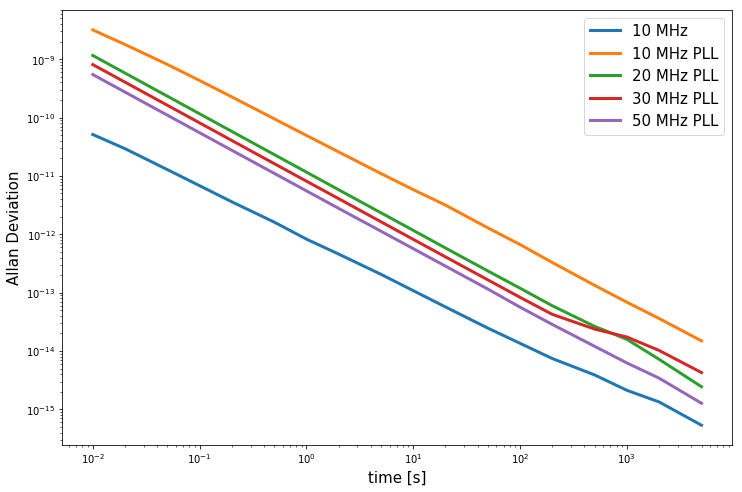

In [17]:
mask = stab10 > 0

stabx = []
for i in range(10):
    stabx.append(1e-2*10**i)
    stabx.append(2e-2*10**i)
    stabx.append(5e-2*10**i)
stabx = np.array(stabx)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(stabx[mask], stab10[mask], lw = 3, label = '10 MHz')
ax.plot(stabx[mask], stab10pll[mask], lw = 3, label = '10 MHz PLL')
ax.plot(stabx[mask], stab20[mask], lw = 3, label = '20 MHz PLL')
ax.plot(stabx[mask], stab30[mask], lw = 3, label = '30 MHz PLL')
ax.plot(stabx[mask], stab50[mask], lw = 3, label = '50 MHz PLL')
ax.legend(fontsize = 15);
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time [s]', fontsize = 15)
ax.set_ylabel('Allan Deviation', fontsize = 15);\
fig.savefig('AllanDeviationPLL.png', dpi = 150)

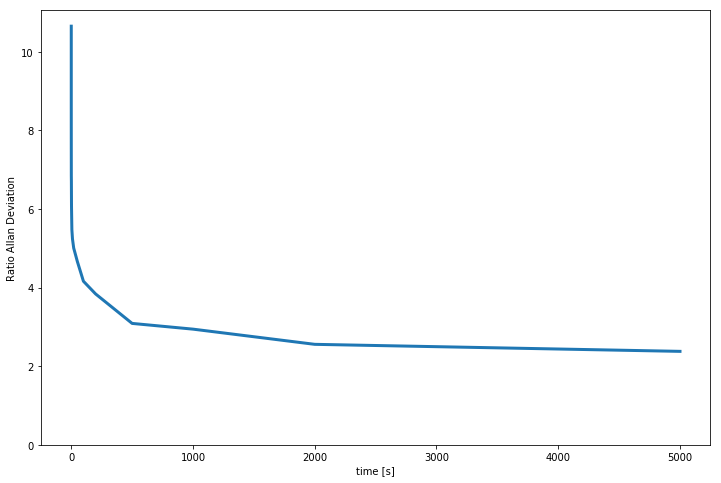

In [5]:
mask = stab10 > 0

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(stabx[mask], stab50[mask]/stab10[mask], lw = 3)
ax.set_ylim(ymin = 0)
ax.set_xlabel('time [s]')
ax.set_ylabel('Ratio Allan Deviation');

In [11]:
freq10 = np.array([float(val) for val in freq10])
freq10pll = np.array([float(val) for val in freq10pll])
freq20 = np.array([float(val) for val in freq20])
freq30 = np.array([float(val) for val in freq30])
freq50 = np.array([float(val) for val in freq50])

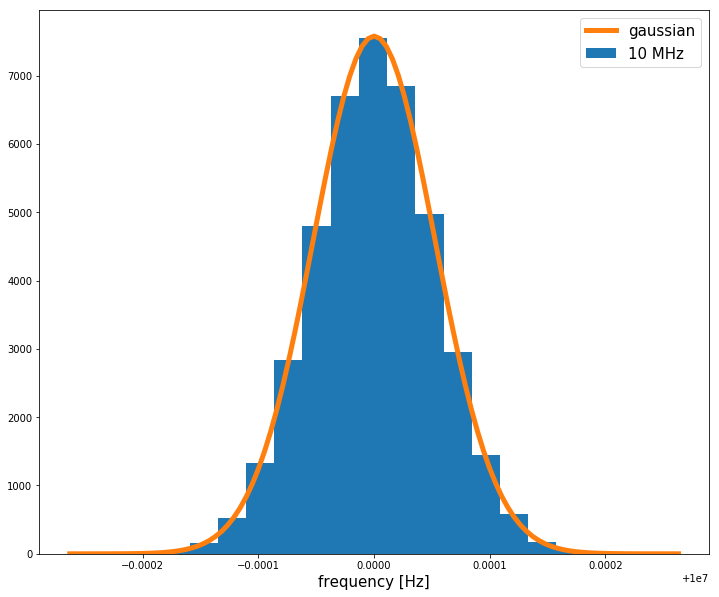

In [7]:
from scipy.stats import norm

(mu10, sigma10) = norm.fit(freq10)

fig, ax = plt.subplots(figsize = (12,10))
n, bins, patches = ax.hist(freq10, bins = 20, density = True, label = '10 MHz')

x = np.linspace(mu10-5*sigma10, mu10+5*sigma10, 101)
ax.plot(x, norm.pdf(x, loc = mu10, scale = sigma10), lw = 5, label = 'gaussian')
ax.set_xlabel('frequency [Hz]', fontsize = 15);
ax.legend(fontsize = 15);
fig.savefig('10MHzHist.png', dpi = 150)

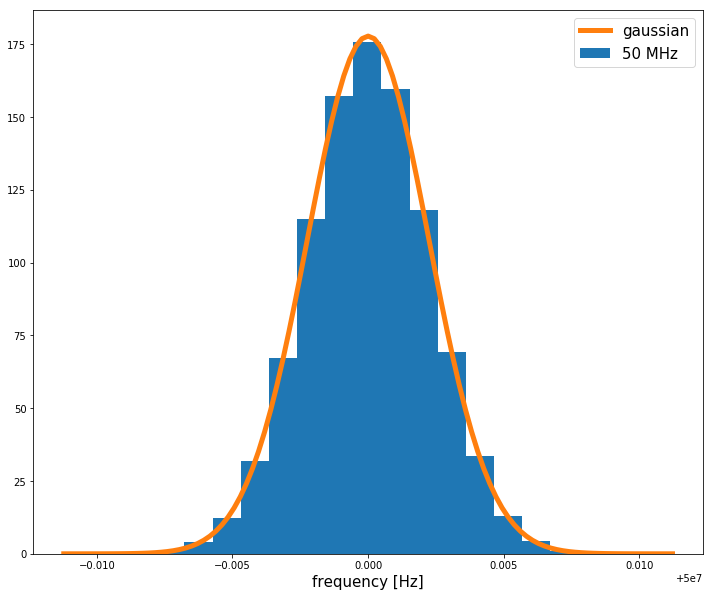

In [8]:
from scipy.stats import norm

(mu50, sigma50) = norm.fit(freq50)

fig, ax = plt.subplots(figsize = (12,10))
n, bins, patches = ax.hist(freq50, bins = 20, density = True, label = '50 MHz')

x = np.linspace(mu50-5*sigma50, mu50+5*sigma50, 101)
ax.plot(x, norm.pdf(x, loc = mu50, scale = sigma50), lw = 5, label = 'gaussian')
ax.set_xlabel('frequency [Hz]', fontsize = 15);
ax.legend(fontsize = 15);
fig.savefig('50MHz.png', dpi = 150)

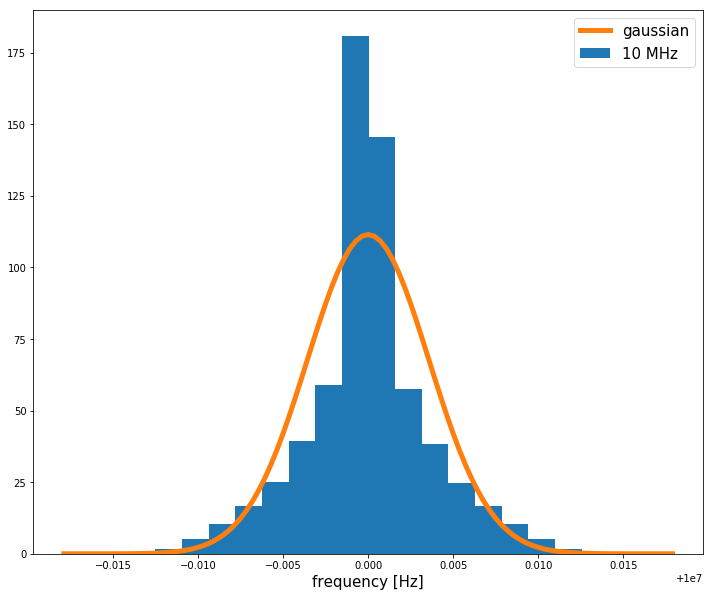

In [12]:
from scipy.stats import norm

(mu10pll, sigma10pll) = norm.fit(freq10pll)

fig, ax = plt.subplots(figsize = (12,10))
n, bins, patches = ax.hist(freq10pll, bins = 20, density = True, label = '10 MHz')

x = np.linspace(mu10pll-5*sigma10pll, mu10pll+5*sigma10pll, 101)
ax.plot(x, norm.pdf(x, loc = mu10pll, scale = sigma10pll), lw = 5, label = 'gaussian')
ax.set_xlabel('frequency [Hz]', fontsize = 15);
ax.legend(fontsize = 15);
fig.savefig('10MHzPLLHist.png', dpi = 150)

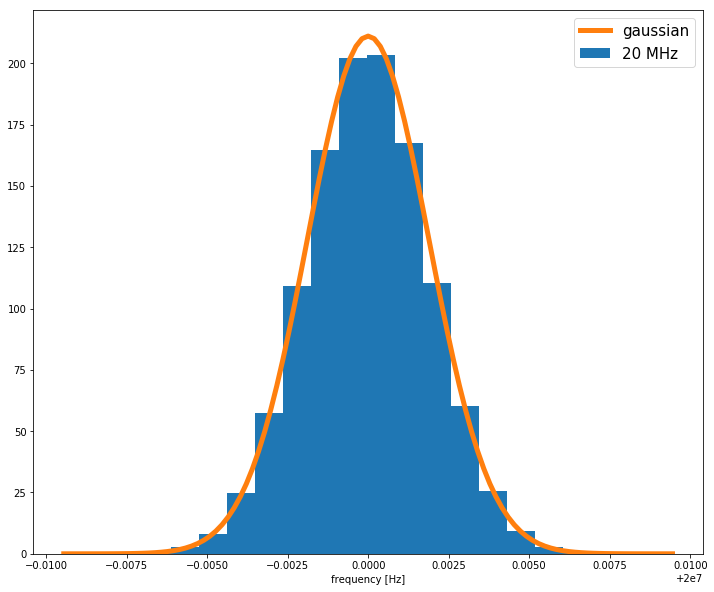

In [13]:
from scipy.stats import norm

(mu20, sigma20) = norm.fit(freq20)

fig, ax = plt.subplots(figsize = (12,10))
n, bins, patches = ax.hist(freq20, bins = 20, density = True, label = '20 MHz')

x = np.linspace(mu20-5*sigma20, mu20+5*sigma20, 101)
ax.plot(x, norm.pdf(x, loc = mu20, scale = sigma20), lw = 5, label = 'gaussian')
ax.set_xlabel('frequency [Hz]');
ax.legend(fontsize = 15);

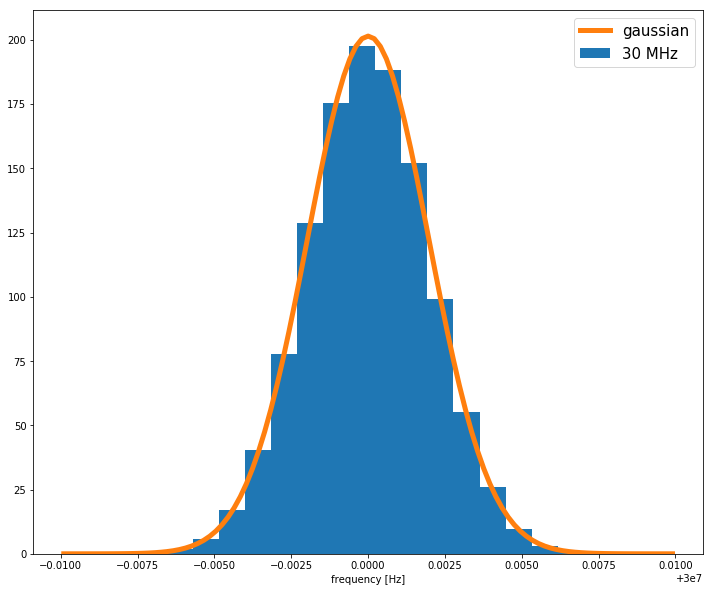

In [14]:
from scipy.stats import norm

(mu30, sigma30) = norm.fit(freq30)

fig, ax = plt.subplots(figsize = (12,10))
n, bins, patches = ax.hist(freq30, bins = 20, density = True, label = '30 MHz')

x = np.linspace(mu30-5*sigma30, mu30+5*sigma30, 101)
ax.plot(x, norm.pdf(x, loc = mu30, scale = sigma30), lw = 5, label = 'gaussian')
ax.set_xlabel('frequency [Hz]');
ax.legend(fontsize = 15);

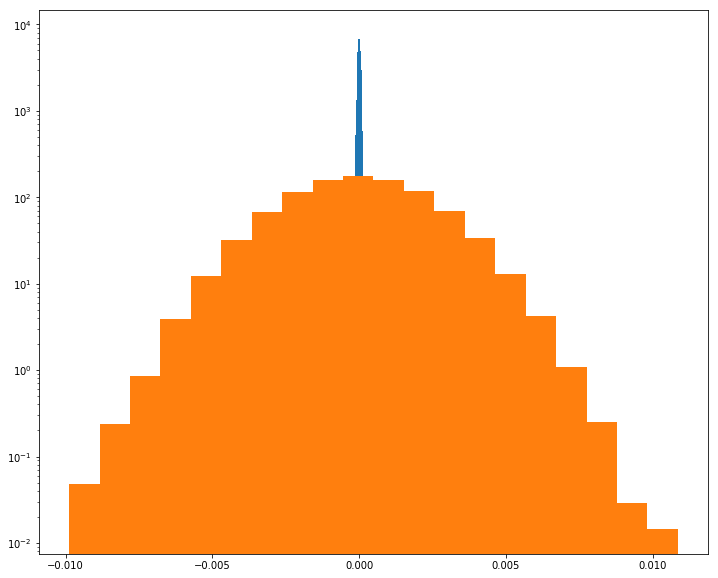

In [15]:
fig, ax = plt.subplots(figsize = (12,10))
ax.hist(freq10 - 1e7, bins = 20, density = True);
ax.hist(freq50 - 5e7, bins = 20, density = True);
ax.set_yscale('log')

In [16]:
1e7-float(stat10[0])

1.1175870895385742e-08

In [ ]:
5e7-float(stat50[0])

In [ ]:
float(stat50[1])/float(stat10[1])

In [ ]:
(5e7-float(stat50[0]))/(1e7-float(stat10[0]))

In [ ]:
stat50

In [ ]:
stat10

In [ ]:
float(stat50[1])/float(stat10[1])

In [ ]:
mu10

In [ ]:
mu50

In [ ]:
sigma10

In [ ]:
sigma50